# **Stroke Prediction Using Classification Model.**

# **Project overview:**
The aim of this project is to develop a stroke prediction model using the Kaggle Stroke Prediction Dataset. The dataset contains various features such as age, gender, hypertension, heart disease, smoking status, BMI, and glucose levels, among others.

The project will involve data preprocessing and exploratory data analysis to gain insights into the data and identify any patterns or correlations between the features. The data will be split into training and testing sets, and various classification models will be developed, such as logistic regression, decision tree, random forest, and neural network models.

The performance of each model will be evaluated based on metrics such as accuracy, precision, recall, and F1 score. The best-performing model will be selected and used to predict the likelihood of stroke in new patients based on their input data.

The final outcome of this project will be a stroke prediction model that can be used by healthcare professionals and researchers to identify patients at risk of stroke and provide appropriate preventive measures and treatments.

# **Dataset Overview**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information:


1) id: unique identifier.

---


2) gender: "Male", "Female" or "Other".

---


3) age: age of the patient.

---


4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.

---


5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.

---


6) ever_married: "No" or "Yes".

---


7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".

---


8) Residence_type: "Rural" or "Urban".

---


9) avg_glucose_level: average glucose level in blood.

---


10) bmi: body mass index.

---


11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*.

---


12) stroke: 1 if the patient had a stroke or 0 if not.

---


*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.
# Dataset Link
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# **Load Dataset**

In [ ]:
health = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
health.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
health.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
health.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
health_df = pd.DataFrame(health)
# Print the DataFrame
health_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Information about our data
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
health_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.271429
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.444740
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,1.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **Preprocessing**

In [ ]:
#Deleting id column as it is not necessary for stroke prediction
del health_df['id']
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
health_df['gender'] = health_df['gender'].map({'Male': 1, 'Female': 0,'Other':2})

health_df['ever_married'] = health_df['ever_married'].map({'Yes': 1, 'No': 0})

health_df['work_type'] = health_df['work_type'].map({'Private': 0, 'Self-employed': 1,'children':2,'Govt_job':3,'Never_worked':4})

health_df['Residence_type'] = health_df['Residence_type'].map({'Urban': 1, 'Rural': 0})

health_df['smoking_status'] = health_df['smoking_status'].map({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3})
health_df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,1,0,202.21,NaN,0,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,0,49.0,0,0,1,0,1,171.23,34.4,3,1
4,0,79.0,1,0,1,1,0,174.12,24.0,0,1
5,1,81.0,0,0,1,0,1,186.21,29.0,2,1
6,1,74.0,1,1,1,0,0,70.09,27.4,0,1
7,0,69.0,0,0,0,0,1,94.39,22.8,0,1
8,0,59.0,0,0,1,0,0,76.15,NaN,1,1
9,0,78.0,0,0,1,0,1,58.57,24.2,1,1


In [ ]:
health_df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
#Checking 0 value arries or not for the all attributes
health_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#calculating the mean of bmi column values
health_df["bmi"].mean()

28.893236911794666

In [ ]:
#replacing the mean value with null cells
health_df.fillna('28.89', inplace = True)

In [ ]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   object 
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 439.3+ KB


In [ ]:
#changing the data type of bmi column
health_df['bmi'] = health_df['bmi'].astype(float)

In [ ]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


Here we can see data is missing in bmi column.Which is 201.So we calculate the mean of bmi and replace with null value. And we also convert the data type of bmi from object to float.

# **Exploratory data analysis**

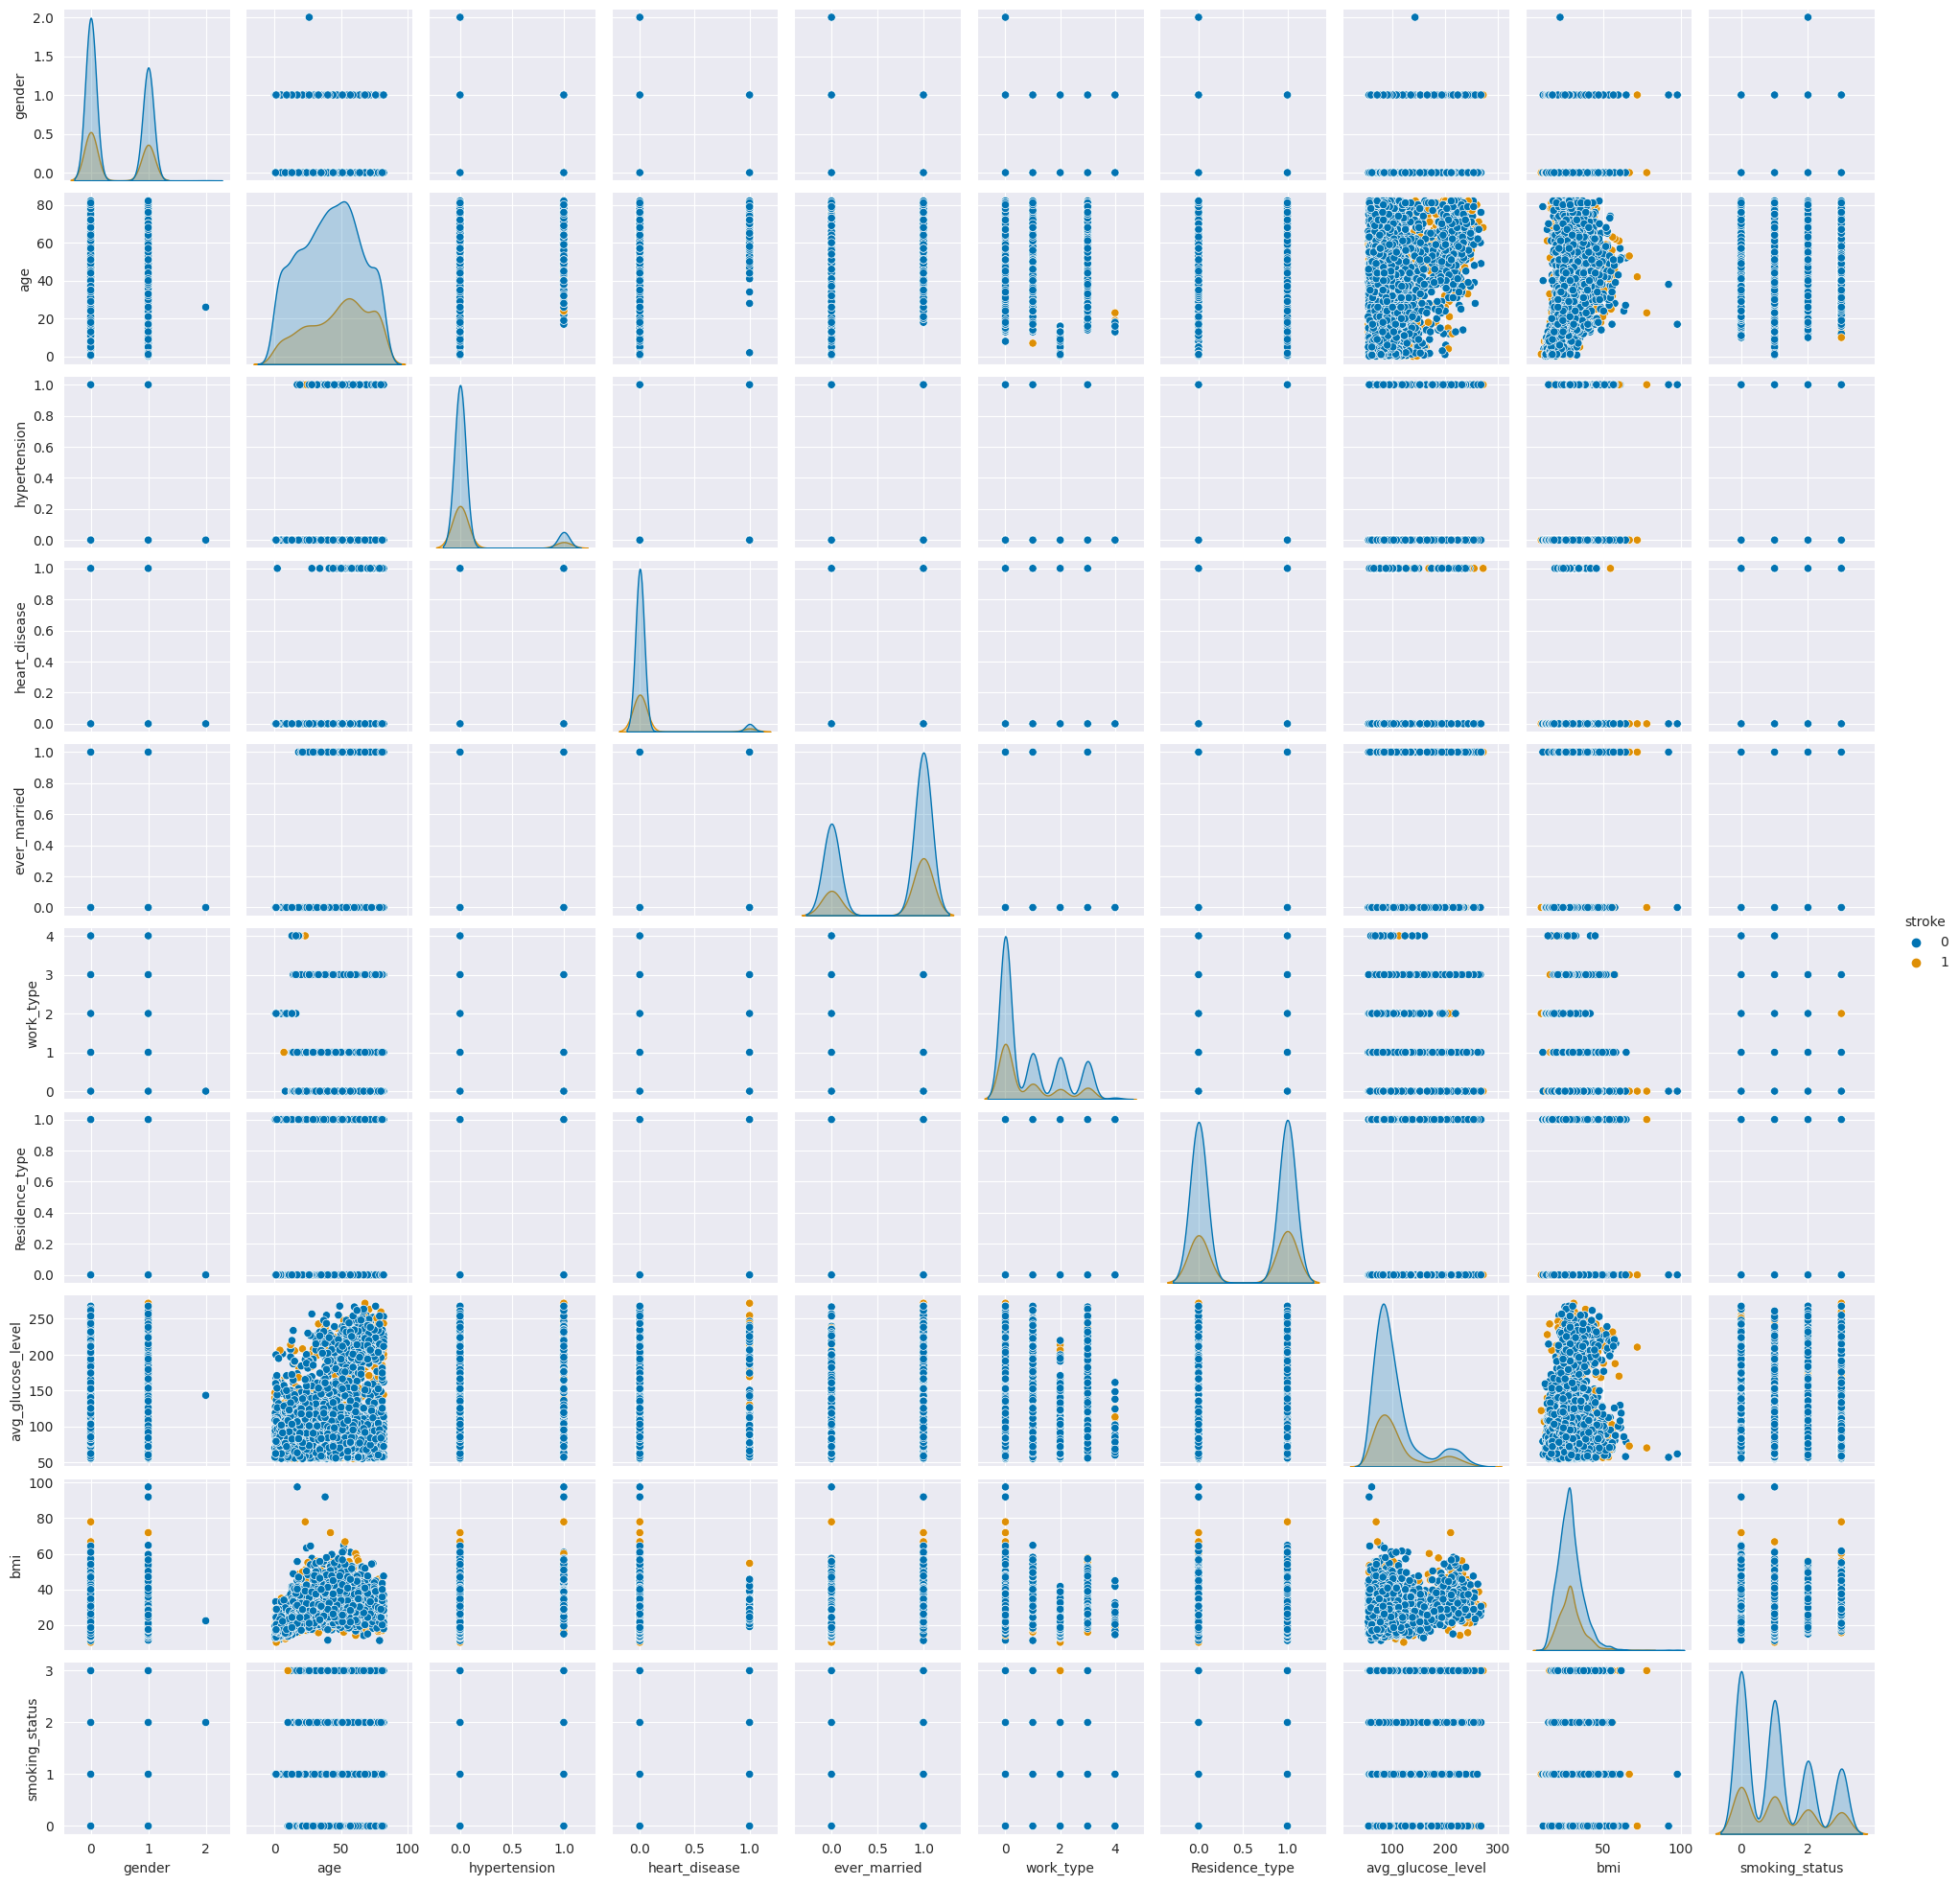

In [ ]:
sns.pairplot(health_df, hue='stroke', height = 2, palette = 'colorblind')

plt.show()

This is the pair of the featues of the dataset. In the plot, we can see the relations of every column with the stroke or the targeted column.

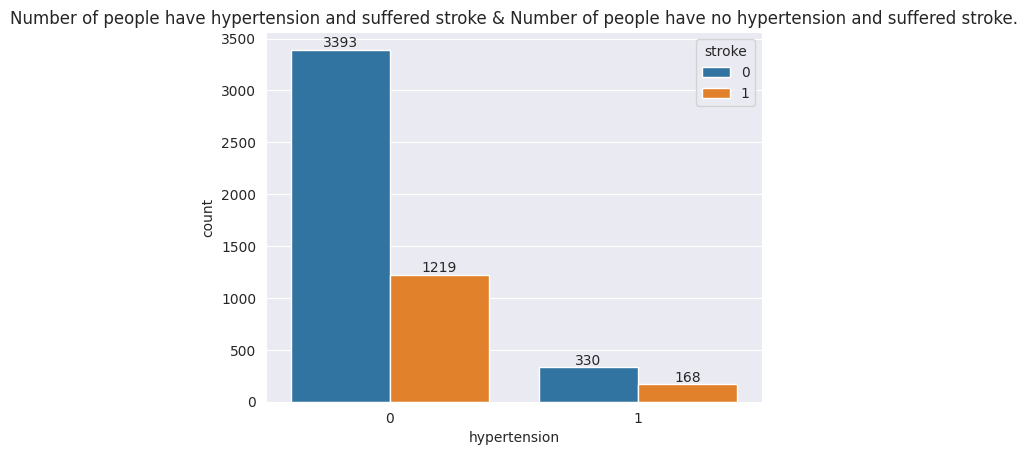

In [ ]:
ax = sns.countplot(x='hypertension', data=health_df,hue='stroke')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Number of people have hypertension and suffered stroke & Number of people have no hypertension and suffered stroke.");
plt.show()

This is a countplot between stoked and non stroked person and person with hypertension. Here, 0 represent the group of people who doesn't have hypertension and 1 represent who does have hypertension. In the plot, we can see that 3393 people who doesn't have hypertension also hasn't stroked also and 1219 people doesn't have hypertension but have stroke. On the other hand, 330 people has hypertension but didn't stoke and 168 people has hypertension and stroked also.  So, we understand that who have hypertension have high tendency of stroke.

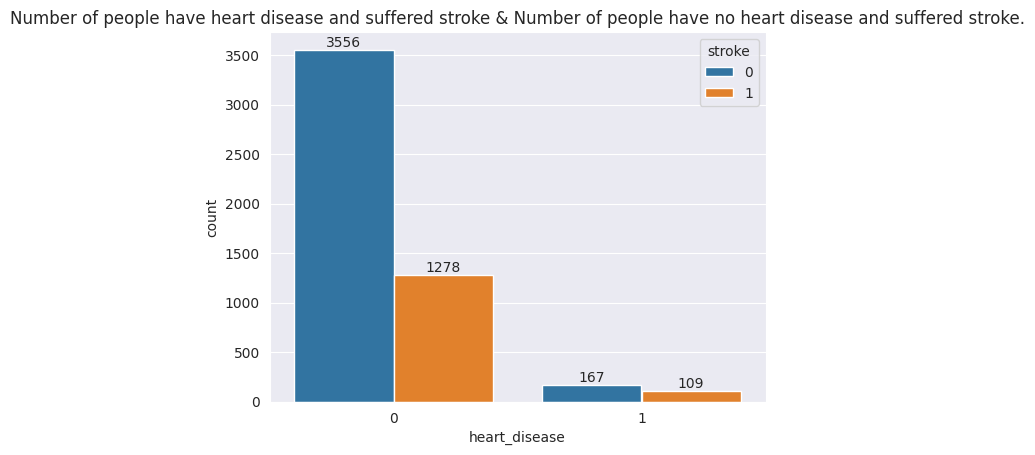

In [ ]:
ax = sns.countplot(x='heart_disease', data=health_df, hue='stroke')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Number of people have heart disease and suffered stroke & Number of people have no heart disease and suffered stroke.");
plt.show()

This is the countplot between people who suffered with heart disease and stroked and non stroked people. Here, 0 represent the group of people who doesn't have heart_disease and 1 represent who does have heart_disease. In the plot, we can see that 3556 male and 1278 female doesn't have heart_disease hasn't suffered stroke also. On the other hand, 167 male and 109 female does have heart_disease also suffered stroke. So, we understand that who have heart_disease have high tendency of stroke.

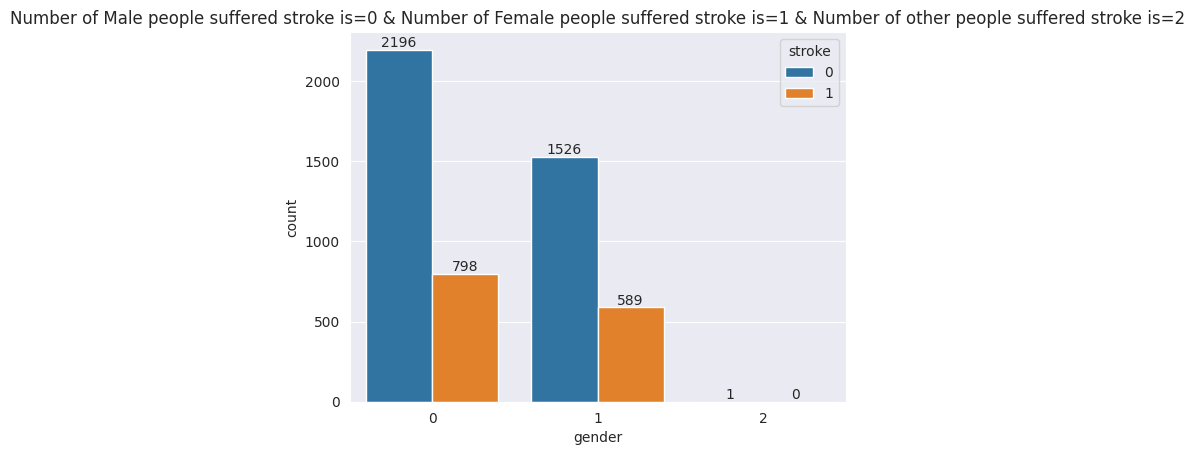

In [ ]:
ax = sns.countplot(x='gender', data=health_df, hue='stroke')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Number of Male people suffered stroke is=0 & Number of Female people suffered stroke is=1 & Number of other people suffered stroke is=2");
plt.show()

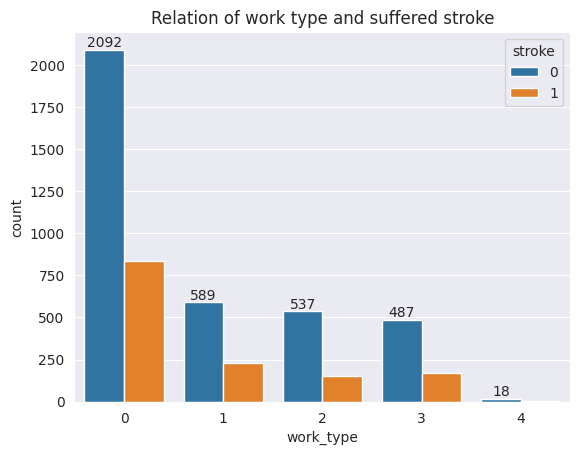

In [ ]:
ax = sns.countplot(x='work_type', data=health_df,hue='stroke')
ax.bar_label(ax.containers[0])
plt.title("Relation of work type and suffered stroke");
plt.show()

From these count plot we can identify that how much it is correlated
for a perticular feature of the dataset

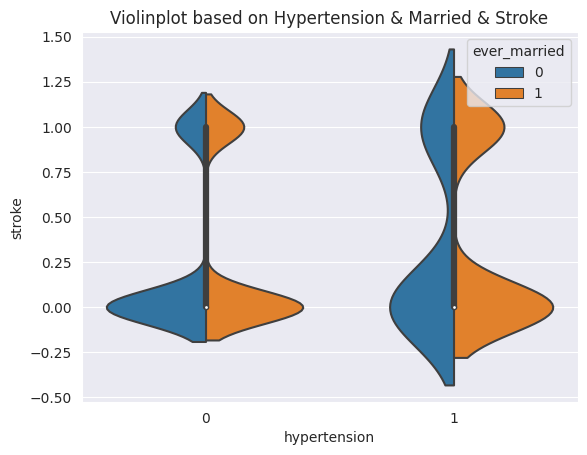

In [ ]:
sns.violinplot(x='hypertension', y='stroke', data= health_df,hue='ever_married',split=True)
plt.title("Violinplot based on Hypertension & Married & Stroke");

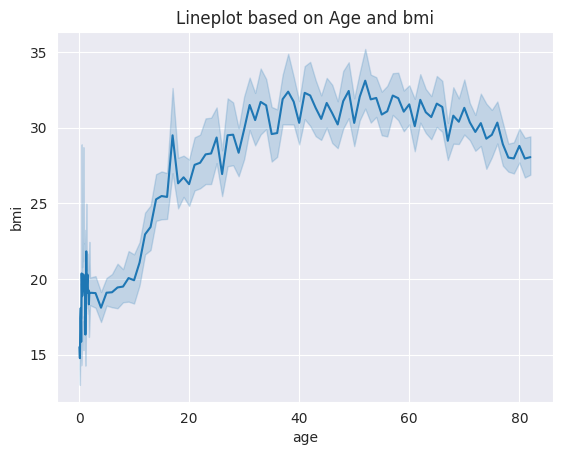

In [ ]:
sns.lineplot(x="age", y="bmi", data=health_df)
# Setting title of the plot
plt.title("Lineplot based on Age and bmi");

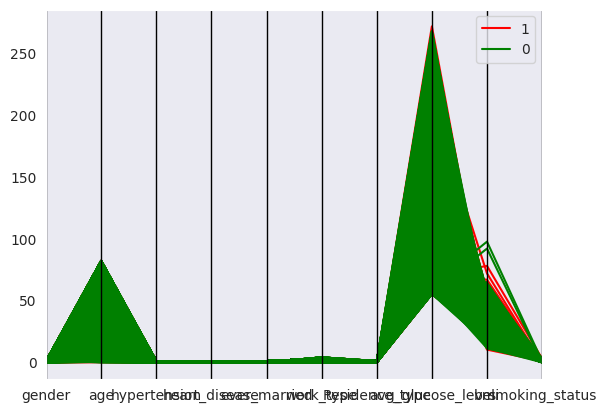

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(health_df, "stroke", color = ['red', 'green']);

Text(0.5, 1.0, 'Number of People had a stroke or not')

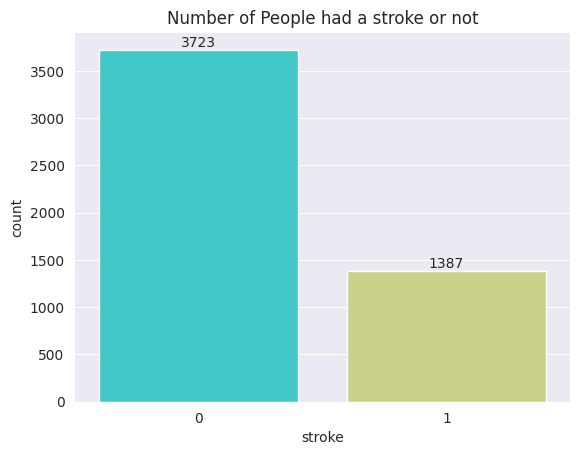

In [ ]:
#Showing the number of Stroke or Not stroke on a plot
ax=sns.countplot(x='stroke',data=health_df, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title('Number of People had a stroke or not')

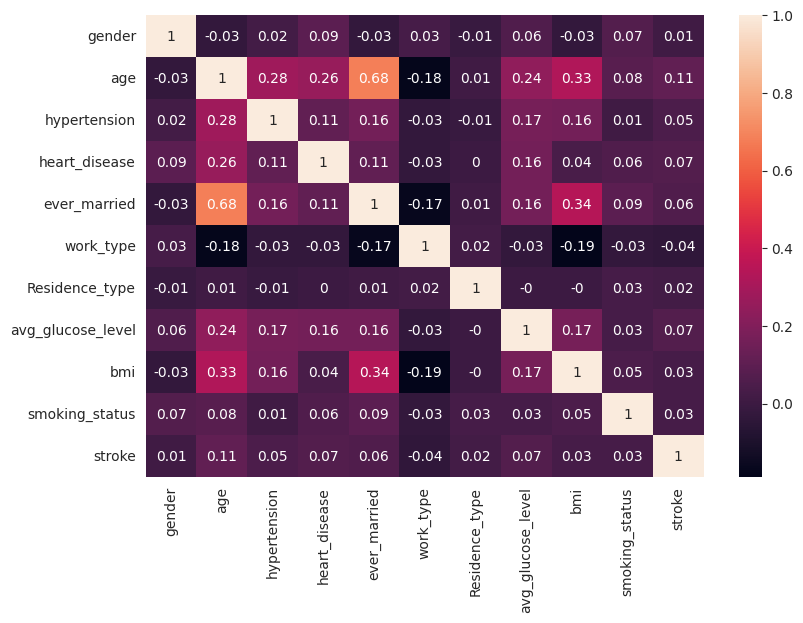

In [ ]:
correlation_matrix = health_df.corr().round(2)
plt.figure(figsize = (9, 6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

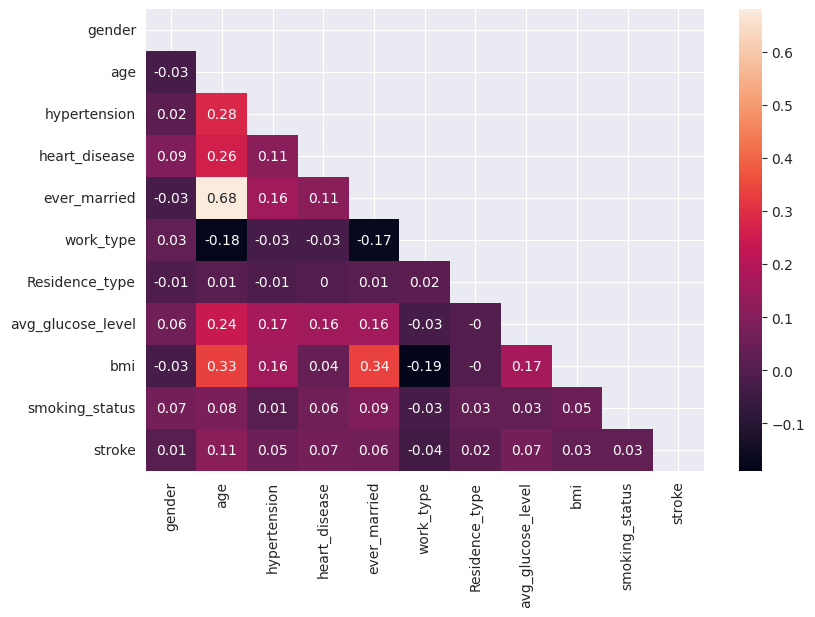

In [ ]:
 # Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

In [ ]:
#feature selection from dataset
x = health_df.drop('stroke',axis=1)
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,0,1,228.69,36.60,2
1,0,61.0,0,0,1,1,0,202.21,28.89,0
2,1,80.0,0,1,1,0,0,105.92,32.50,0
3,0,49.0,0,0,1,0,1,171.23,34.40,3
4,0,79.0,1,0,1,1,0,174.12,24.00,0
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.89,0
5106,0,81.0,0,0,1,1,1,125.20,40.00,0
5107,0,35.0,0,0,1,1,0,82.99,30.60,0
5108,1,51.0,0,0,1,0,0,166.29,25.60,2


In [ ]:
# target selection from dataset
y = health_df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3832, 10)
(1278, 10)
(3832,)
(1278,)


In [ ]:
score=[]

Gaussian Naive Bayes (NB)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained mo
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(6)
print("---------------------------------")
print('The accuracy of the NB is: {}%'.format(score_nb*100))
print("---------------------------------")
# save the accuracy score
score.append(score_nb)

---------------------------------
The accuracy of the NB is: 66.9797%
---------------------------------


K Nearest Neighbours (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algo
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(6)
print("----------------------------------")
print('The accuracy of the KNN is: {}%'.format(score_knn*100))
print("----------------------------------")
# save the accuracy score
score.append(score_knn)

----------------------------------
The accuracy of the KNN is: 64.0845%
----------------------------------


Decision Tree

In [ ]:
#Training and calculating accuracy for SVM
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained mo
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(6)
print("---------------------------------")
print('The accuracy of the DT is: {}%'.format(score_dt*100))
print("---------------------------------")
# save the accuracy score
score.append(score_dt)

---------------------------------
The accuracy of the DT is: 58.9202%
---------------------------------


Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression algor
model_lr = LogisticRegression(solver='lbfgs', max_iter=500)
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained mo
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(6)
print("---------------------------------")
print('The accuracy of the LR is: {}%'.format(score_lr*100))
print("---------------------------------")
# save the accuracy score
score.append(score_lr)

---------------------------------
The accuracy of the LR is: 71.6745%
---------------------------------


Create Model
Support Vector Machine (SVM)

In [ ]:
#Training and calculating accuracy for SVM
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics # for checking the model accuracy
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(6)
print("----------------------------------")
print('The accuracy of the SVM is: {}%'.format(score_svm*100))
print("----------------------------------")
# save the accuracy score
score.append(score_svm)

----------------------------------
The accuracy of the SVM is: 71.5962%
----------------------------------


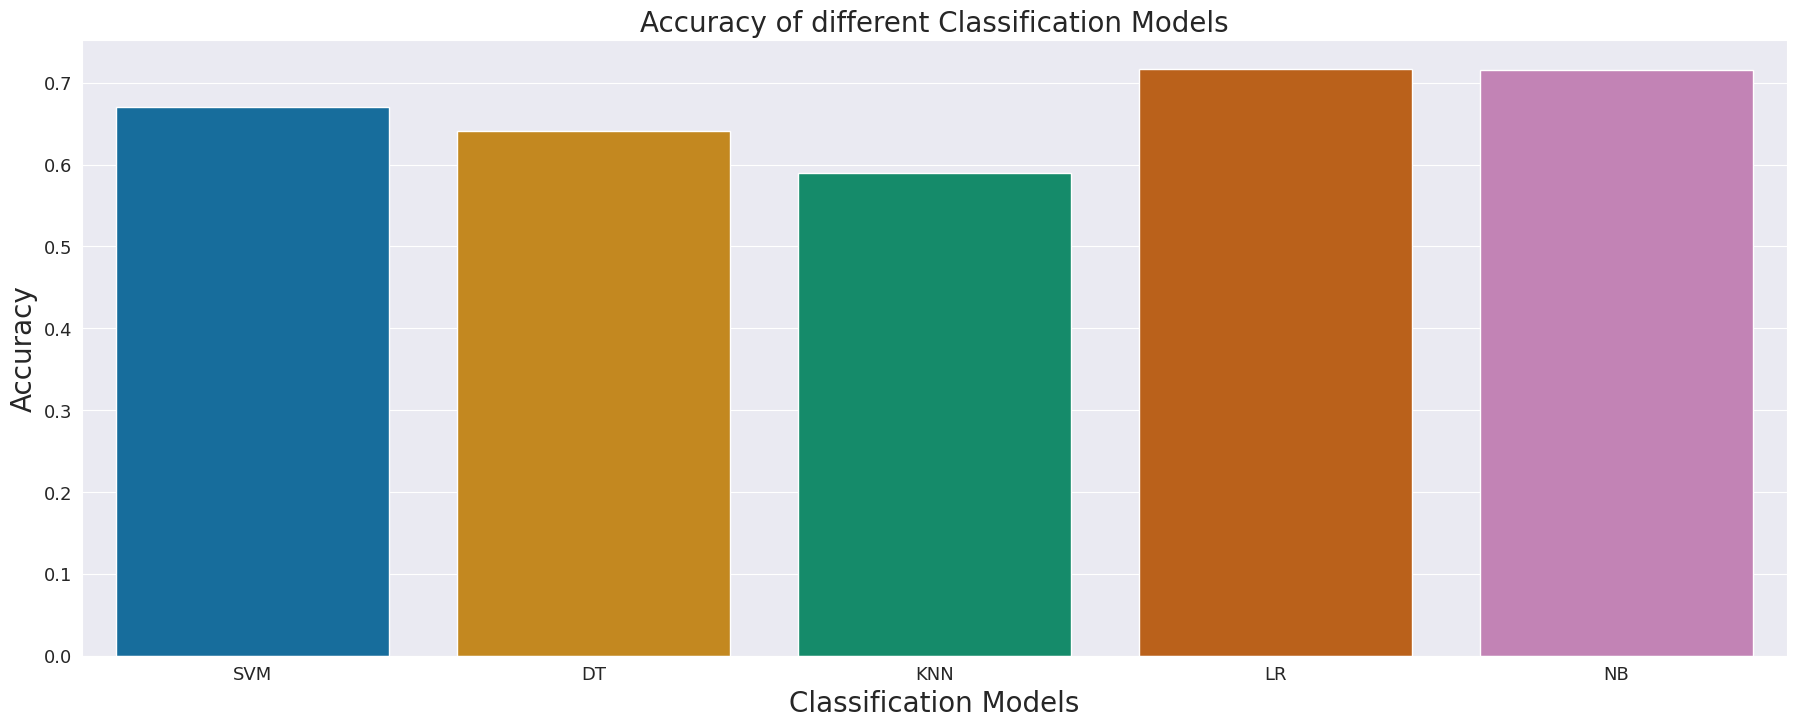

In [ ]:
#comparing traning model's accuracy
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
classifier = ['SVM','DT','KNN','LR','NB']
ax = sns.barplot(x=classifier, y=score, palette = "colorblind")
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center')
plt.yticks(fontsize = 13)
plt.show()

In [ ]:
max=score[0]
for i in range(0,len(score),+1):
    if score[i]>=max:
        max=score[i]

print('The maximum accuracy from all these algorithm is {}%'.format(max*100))

The maximum accuracy from all these algorithm is 71.6745%
